<a href="https://colab.research.google.com/github/e-waithaka/e-waithaka/blob/main/health%20system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tabulate import tabulate

data = [
    ["Books", "Building Scalable Apps with Google Cloud", "Mohit Bajoria", "Discusses scalable architecture, which is crucial for an E-commerce application."],
    ["", "Hands-On Machine Learning with Scikit-Learn", "Aurélien Géron", "Provides practical insights into machine learning, a fundamental aspect of AI recommendations."],
    ["", "React Native in Action", "Nader Dabit", "Focuses on React Native, suitable for developing cross-platform mobile applications."],
    ["Online Courses", "Machine Learning", "Andrew Ng (Coursera)", "A comprehensive course on machine learning, covering key concepts for AI implementation."],
    ["", "React Native - The Practical Guide", "Maximilian Schwarzmüller", "A hands-on course for mastering React Native development for mobile applications."],
    ["Tools/Frameworks", "TensorFlow", "-", "An open-source machine learning framework, useful for implementing AI in applications."],
    ["", "PyTorch", "-", "A deep learning framework that could be an alternative to TensorFlow for AI development."],
    ["", "Expo", "-", "A toolchain and set of services built around React Native for an easier development process."],
    ["Research Papers", "Personalized Recommendation Systems in E-commerce", "R. Burke", "Explores various techniques for building personalized recommendation systems in E-commerce."],
    ["", "A Survey of Recommender Systems in E-commerce", "J. Bobadilla", "Reviews the state-of-the-art in recommender systems, providing insights into E-commerce."],
    ["Journals/Articles", "Enhancing the User Experience in E-commerce with AI", "A. Smith", "Discusses the impact of AI on user experience in E-commerce applications."],
    ["", "Challenges and Opportunities in E-commerce Mobile App Development", "B. Lee", "Addresses the specific challenges and opportunities in developing mobile apps for E-commerce."]
]

headers = ["Type", "Resource Title", "Author/Instructor", "Description"]

# Use the 'pipe' table format for better alignment
table = tabulate(data, headers, tablefmt="pipe")

print(table)


| Type              | Resource Title                                                    | Author/Instructor        | Description                                                                                    |
|:------------------|:------------------------------------------------------------------|:-------------------------|:-----------------------------------------------------------------------------------------------|
| Books             | Building Scalable Apps with Google Cloud                          | Mohit Bajoria            | Discusses scalable architecture, which is crucial for an E-commerce application.               |
|                   | Hands-On Machine Learning with Scikit-Learn                       | Aurélien Géron           | Provides practical insights into machine learning, a fundamental aspect of AI recommendations. |
|                   | React Native in Action                                            | Nader Dabit              | Focuses on React Native, su

In [ ]:
!pip install simpy
import simpy
import random

class HealthcareSystem:
    def __init__(self, env, initial_providers, initial_facilities):
        self.env = env
        self.providers = simpy.Resource(env, capacity=initial_providers)
        self.facilities = simpy.Resource(env, capacity=initial_facilities)

    def patient_flow(self, patient):
        with self.providers.request() as req:
            yield req
            # Treatment completion process
            yield self.env.timeout(random.randint(1, 5))
            print(f"Patient {patient} has completed treatment at time {self.env.now}")

        # Discharge process
        with self.facilities.request() as req:
            yield req
            yield self.env.timeout(random.randint(1, 3))
            print(f"Patient {patient} has been discharged at time {self.env.now}")

def patient_generator(env, healthcare_system, num_patients):
    for i in range(num_patients):
        env.process(healthcare_system.patient_flow(i))
        yield env.timeout(random.randint(1, 4))

def run_simulation():
    env = simpy.Environment()
    healthcare_system = HealthcareSystem(env, initial_providers=5, initial_facilities=10)
    env.process(patient_generator(env, healthcare_system, num_patients=10))
    env.run(until=30)

run_simulation()


Patient 0 has completed treatment at time 2
Patient 1 has completed treatment at time 5
Patient 0 has been discharged at time 5
Patient 1 has been discharged at time 8
Patient 3 has completed treatment at time 8
Patient 2 has completed treatment at time 10
Patient 4 has completed treatment at time 10
Patient 3 has been discharged at time 11
Patient 2 has been discharged at time 12
Patient 4 has been discharged at time 12
Patient 5 has completed treatment at time 13
Patient 5 has been discharged at time 14
Patient 6 has completed treatment at time 16
Patient 8 has completed treatment at time 18
Patient 6 has been discharged at time 19
Patient 7 has completed treatment at time 20
Patient 8 has been discharged at time 20
Patient 9 has completed treatment at time 22
Patient 7 has been discharged at time 22
Patient 9 has been discharged at time 23


Patient 0 has been discharged at time 4
Patient 2 has been discharged at time 7
Patient 1 has been discharged at time 8
Patient 4 has been discharged at time 13
Patient 3 has been discharged at time 14
Patient 5 has been discharged at time 15
Patient 6 has been discharged at time 17
Patient 7 has been discharged at time 19
Patient 8 has been discharged at time 22
Patient 9 has been discharged at time 23


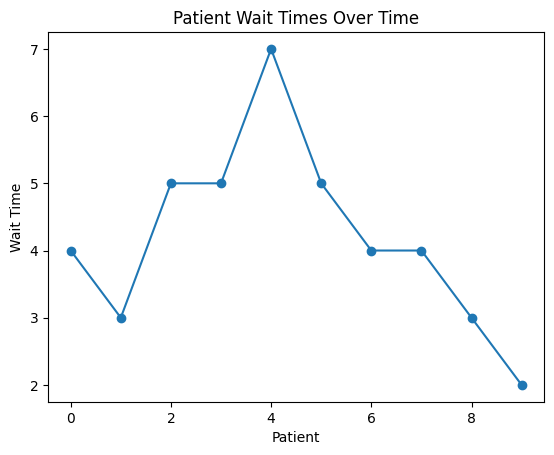

In [ ]:
import simpy
import random
import matplotlib.pyplot as plt

class HealthcareSystem:
    def __init__(self, env, initial_providers, initial_facilities):
        self.env = env
        self.providers = simpy.Resource(env, capacity=initial_providers)
        self.facilities = simpy.Resource(env, capacity=initial_facilities)
        self.wait_times = []

    def patient_flow(self, patient):
        arrival_time = self.env.now
        with self.providers.request() as req:
            yield req
            # Treatment completion process
            yield self.env.timeout(random.randint(1, 5))

        treatment_completion_time = self.env.now

        # Discharge process
        with self.facilities.request() as req:
            yield req
            yield self.env.timeout(random.randint(1, 3))

        discharge_time = self.env.now
        self.wait_times.append(discharge_time - arrival_time)

        print(f"Patient {patient} has been discharged at time {discharge_time}")

def patient_generator(env, healthcare_system, num_patients):
    for i in range(num_patients):
        env.process(healthcare_system.patient_flow(i))
        yield env.timeout(random.randint(1, 4))

def run_simulation():
    env = simpy.Environment()
    healthcare_system = HealthcareSystem(env, initial_providers=5, initial_facilities=10)
    env.process(patient_generator(env, healthcare_system, num_patients=10))
    env.run(until=30)

    # Plotting
    plt.plot(healthcare_system.wait_times, marker='o')
    plt.title('Patient Wait Times Over Time')
    plt.xlabel('Patient')
    plt.ylabel('Wait Time')
    plt.show()

run_simulation()


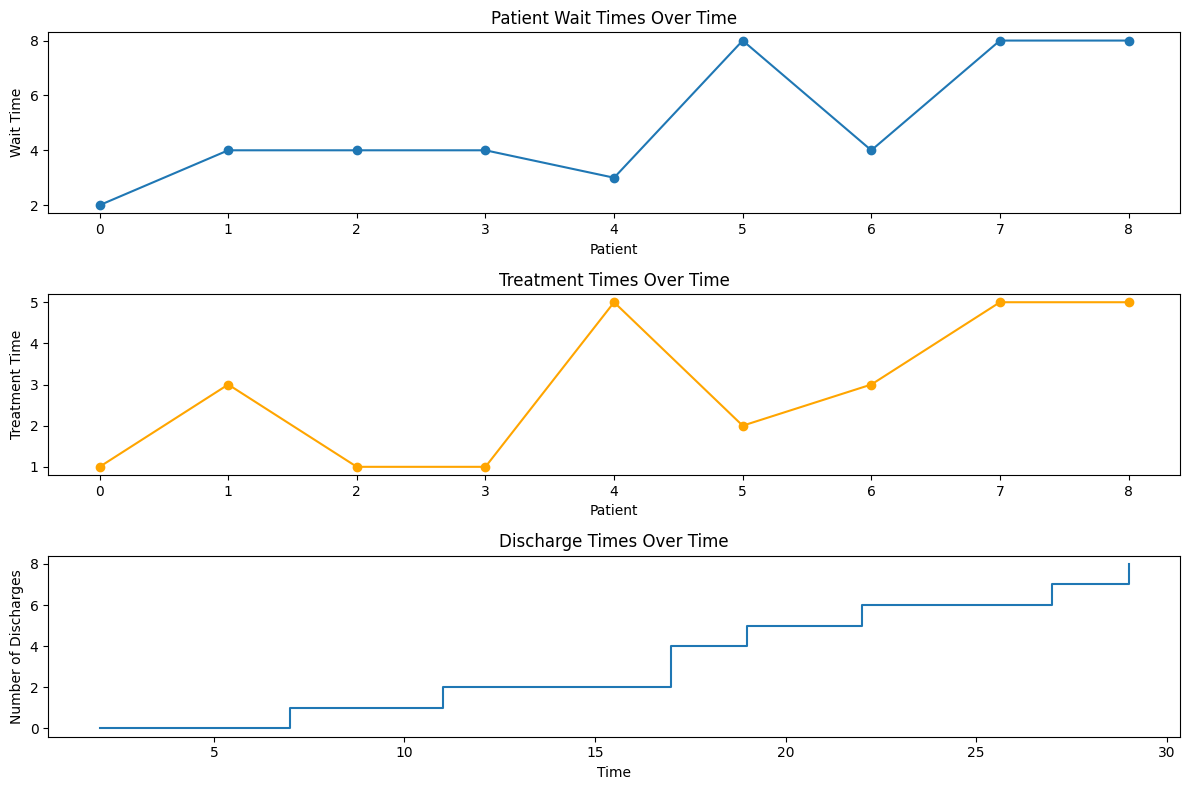

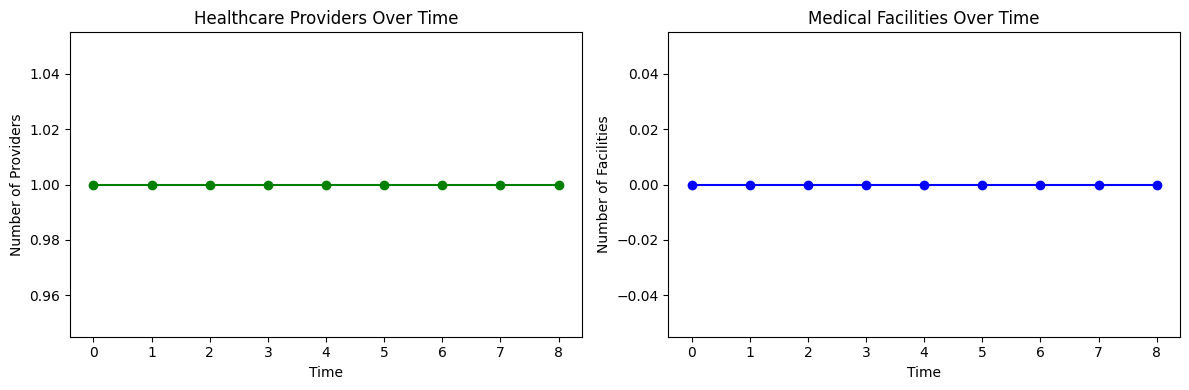

In [ ]:
import simpy
import random
import matplotlib.pyplot as plt

class HealthcareSystem:
    def __init__(self, env, initial_providers, initial_facilities):
        self.env = env
        self.providers = simpy.Resource(env, capacity=initial_providers)
        self.facilities = simpy.Resource(env, capacity=initial_facilities)
        self.wait_times = []
        self.treatment_times = []
        self.discharge_times = []

    def patient_flow(self, patient):
        arrival_time = self.env.now
        with self.providers.request() as req:
            yield req
            # Treatment completion process
            yield self.env.timeout(random.randint(1, 5))
            treatment_completion_time = self.env.now
            self.treatment_times.append(treatment_completion_time - arrival_time)

        # Discharge process
        with self.facilities.request() as req:
            yield req
            yield self.env.timeout(random.randint(1, 3))

        discharge_time = self.env.now
        self.wait_times.append(discharge_time - arrival_time)
        self.discharge_times.append(discharge_time)

    def resource_allocation_stats(self):
        return len(self.providers.users), len(self.facilities.users)

def patient_generator(env, healthcare_system, num_patients):
    for i in range(num_patients):
        env.process(healthcare_system.patient_flow(i))
        yield env.timeout(random.randint(1, 4))

def run_simulation():
    env = simpy.Environment()
    healthcare_system = HealthcareSystem(env, initial_providers=5, initial_facilities=10)
    env.process(patient_generator(env, healthcare_system, num_patients=10))
    env.run(until=30)

    # Plotting
    plt.figure(figsize=(12, 8))

    # Patient Wait Times
    plt.subplot(3, 1, 1)
    plt.plot(healthcare_system.wait_times, marker='o')
    plt.title('Patient Wait Times Over Time')
    plt.xlabel('Patient')
    plt.ylabel('Wait Time')

    # Treatment Times
    plt.subplot(3, 1, 2)
    plt.plot(healthcare_system.treatment_times, marker='o', color='orange')
    plt.title('Treatment Times Over Time')
    plt.xlabel('Patient')
    plt.ylabel('Treatment Time')

    # Discharge Times
    plt.subplot(3, 1, 3)
    plt.step(healthcare_system.discharge_times, range(len(healthcare_system.discharge_times)), where='post')
    plt.title('Discharge Times Over Time')
    plt.xlabel('Time')
    plt.ylabel('Number of Discharges')

    plt.tight_layout()
    plt.show()

    # Resource Allocation Statistics
    providers, facilities = zip(*[healthcare_system.resource_allocation_stats() for _ in range(len(healthcare_system.discharge_times))])

    # Plotting
    plt.figure(figsize=(12, 4))

    # Healthcare Providers
    plt.subplot(1, 2, 1)
    plt.plot(providers, marker='o', color='green')
    plt.title('Healthcare Providers Over Time')
    plt.xlabel('Time')
    plt.ylabel('Number of Providers')

    # Medical Facilities
    plt.subplot(1, 2, 2)
    plt.plot(facilities, marker='o', color='blue')
    plt.title('Medical Facilities Over Time')
    plt.xlabel('Time')
    plt.ylabel('Number of Facilities')

    plt.tight_layout()
    plt.show()

run_simulation()


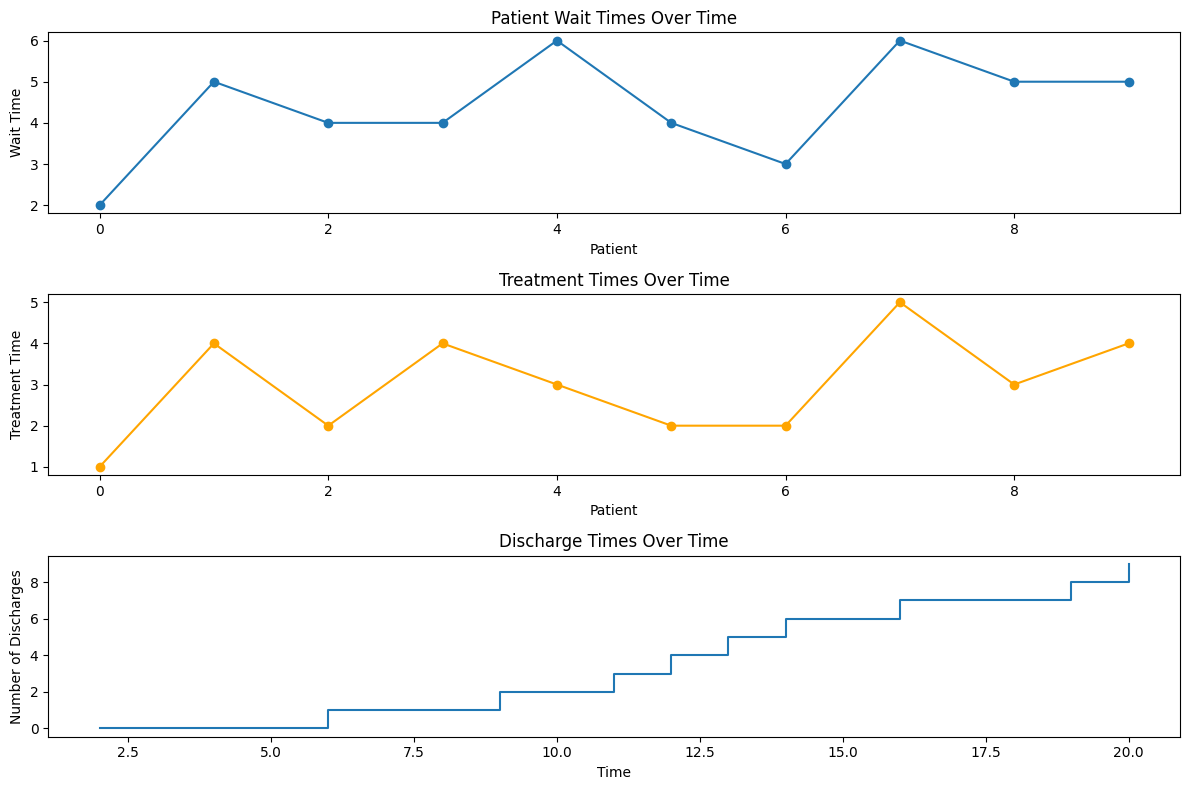

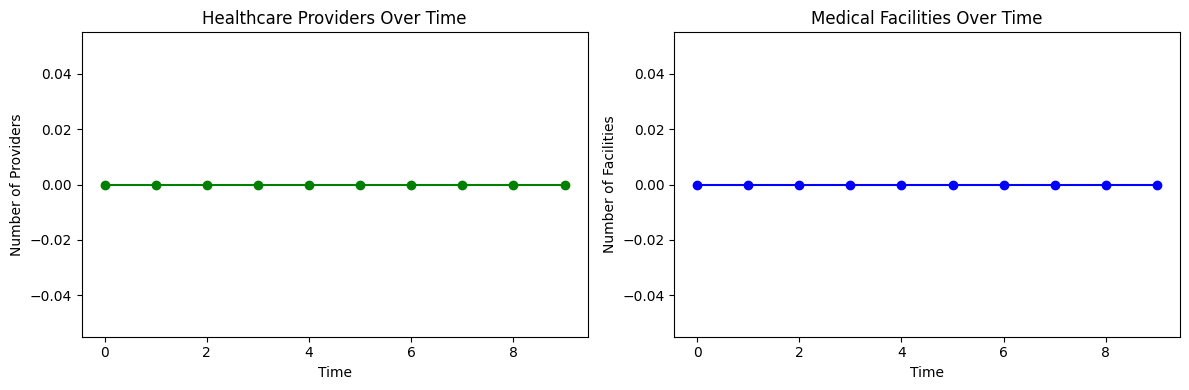

In [ ]:
import simpy
import random
import matplotlib.pyplot as plt

class HealthcareSystem:
    def __init__(self, env, initial_providers, initial_facilities):
        self.env = env
        self.providers = simpy.Resource(env, capacity=initial_providers)
        self.facilities = simpy.Resource(env, capacity=initial_facilities)
        self.wait_times = []
        self.treatment_times = []
        self.discharge_times = []

    def patient_flow(self, patient):
        arrival_time = self.env.now
        with self.providers.request() as req:
            yield req
            # Treatment completion process
            yield self.env.timeout(random.randint(1, 5))
            treatment_completion_time = self.env.now
            self.treatment_times.append(treatment_completion_time - arrival_time)

        # Discharge process
        with self.facilities.request() as req:
            yield req
            yield self.env.timeout(random.randint(1, 3))

        discharge_time = self.env.now
        self.wait_times.append(discharge_time - arrival_time)
        self.discharge_times.append(discharge_time)

    def resource_allocation_stats(self):
        return len(self.providers.users), len(self.facilities.users)

def patient_generator(env, healthcare_system, num_patients):
    for i in range(num_patients):
        env.process(healthcare_system.patient_flow(i))
        yield env.timeout(random.randint(1, 4))

def run_simulation():
    env = simpy.Environment()
    healthcare_system = HealthcareSystem(env, initial_providers=5, initial_facilities=10)
    env.process(patient_generator(env, healthcare_system, num_patients=10))
    env.run(until=30)

    # Plotting
    plt.figure(figsize=(12, 8))

    # Patient Wait Times
    plt.subplot(3, 1, 1)
    plt.plot(healthcare_system.wait_times, marker='o')
    plt.title('Patient Wait Times Over Time')
    plt.xlabel('Patient')
    plt.ylabel('Wait Time')

    # Treatment Times
    plt.subplot(3, 1, 2)
    plt.plot(healthcare_system.treatment_times, marker='o', color='orange')
    plt.title('Treatment Times Over Time')
    plt.xlabel('Patient')
    plt.ylabel('Treatment Time')

    # Discharge Times
    plt.subplot(3, 1, 3)
    plt.step(healthcare_system.discharge_times, range(len(healthcare_system.discharge_times)), where='post')
    plt.title('Discharge Times Over Time')
    plt.xlabel('Time')
    plt.ylabel('Number of Discharges')

    plt.tight_layout()
    plt.show()

    # Resource Allocation Statistics
    providers, facilities = zip(*[healthcare_system.resource_allocation_stats() for _ in range(len(healthcare_system.discharge_times))])

    # Plotting
    plt.figure(figsize=(12, 4))

    # Healthcare Providers
    plt.subplot(1, 2, 1)
    plt.plot(providers, marker='o', color='green')
    plt.title('Healthcare Providers Over Time')
    plt.xlabel('Time')
    plt.ylabel('Number of Providers')

    # Medical Facilities
    plt.subplot(1, 2, 2)
    plt.plot(facilities, marker='o', color='blue')
    plt.title('Medical Facilities Over Time')
    plt.xlabel('Time')
    plt.ylabel('Number of Facilities')

    plt.tight_layout()
    plt.show()

run_simulation()


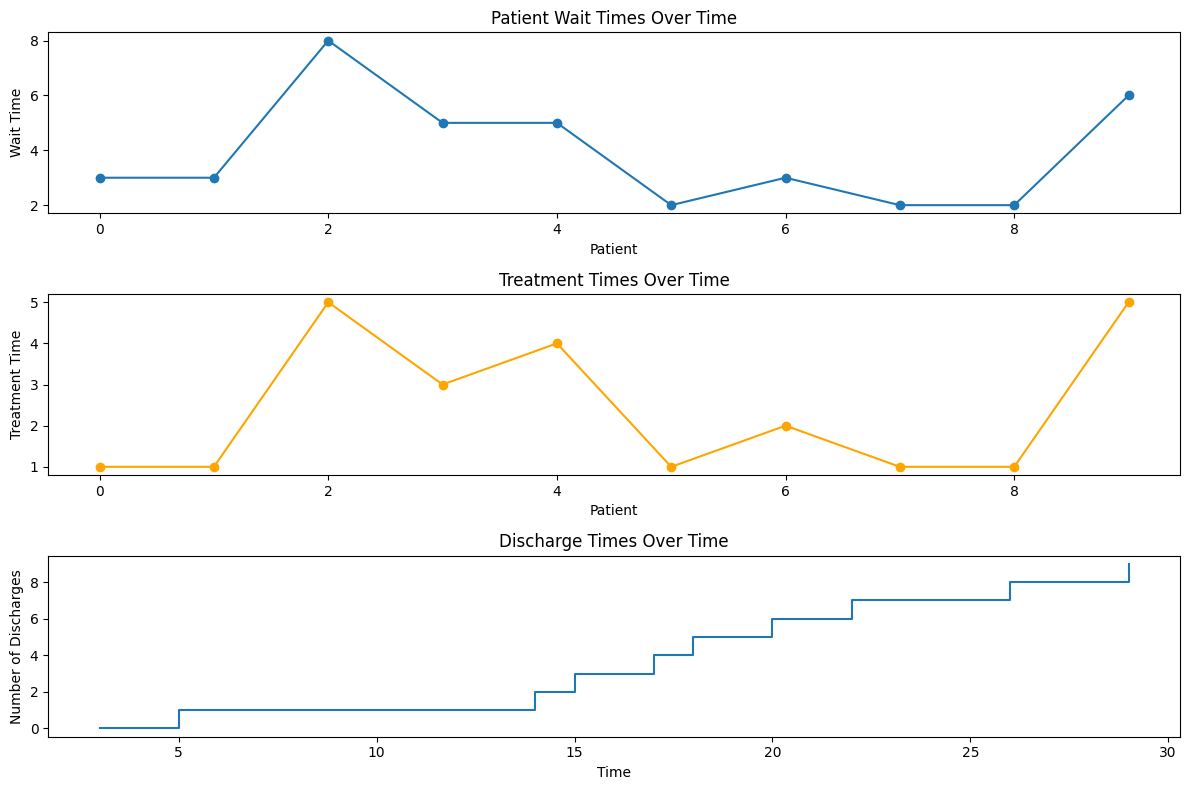

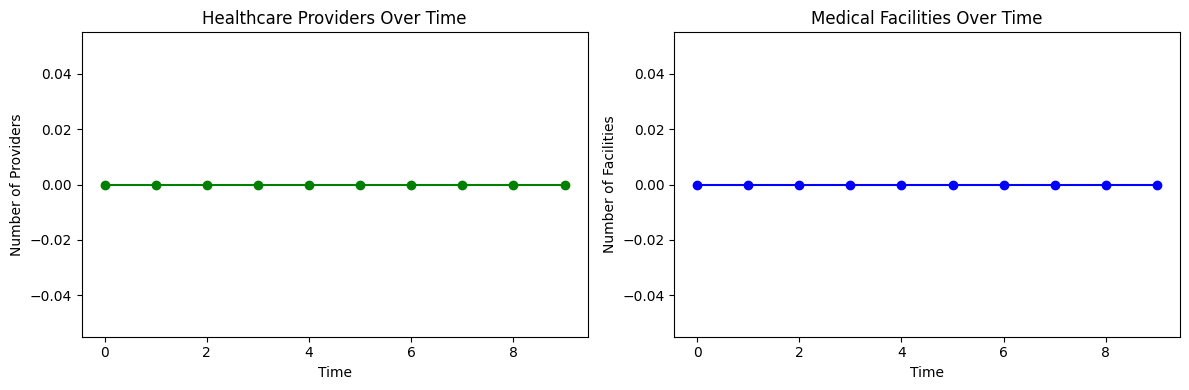

In [ ]:
import simpy
import random
import matplotlib.pyplot as plt

class HealthcareSystem:
    def __init__(self, env, initial_providers, initial_facilities):
        self.env = env
        self.providers = simpy.Resource(env, capacity=initial_providers)
        self.facilities = simpy.Resource(env, capacity=initial_facilities)
        self.wait_times = []
        self.treatment_times = []
        self.discharge_times = []

    def patient_flow(self, patient):
        arrival_time = self.env.now
        with self.providers.request() as req:
            yield req
            # Treatment completion process
            yield self.env.timeout(random.randint(1, 5))
            treatment_completion_time = self.env.now
            self.treatment_times.append(treatment_completion_time - arrival_time)

        # Discharge process
        with self.facilities.request() as req:
            yield req
            yield self.env.timeout(random.randint(1, 3))

        discharge_time = self.env.now
        self.wait_times.append(discharge_time - arrival_time)
        self.discharge_times.append(discharge_time)

    def resource_allocation_stats(self):
        return len(self.providers.users), len(self.facilities.users)

def patient_generator(env, healthcare_system, num_patients):
    for i in range(num_patients):
        env.process(healthcare_system.patient_flow(i))
        yield env.timeout(random.randint(1, 4))

def run_simulation():
    env = simpy.Environment()
    healthcare_system = HealthcareSystem(env, initial_providers=5, initial_facilities=10)
    env.process(patient_generator(env, healthcare_system, num_patients=10))
    env.run(until=30)

    # Plotting
    plt.figure(figsize=(12, 8))

    # Patient Wait Times
    plt.subplot(3, 1, 1)
    plt.plot(healthcare_system.wait_times, marker='o')
    plt.title('Patient Wait Times Over Time')
    plt.xlabel('Patient')
    plt.ylabel('Wait Time')

    # Treatment Times
    plt.subplot(3, 1, 2)
    plt.plot(healthcare_system.treatment_times, marker='o', color='orange')
    plt.title('Treatment Times Over Time')
    plt.xlabel('Patient')
    plt.ylabel('Treatment Time')

    # Discharge Times
    plt.subplot(3, 1, 3)
    plt.step(healthcare_system.discharge_times, range(len(healthcare_system.discharge_times)), where='post')
    plt.title('Discharge Times Over Time')
    plt.xlabel('Time')
    plt.ylabel('Number of Discharges')

    plt.tight_layout()
    plt.show()

    # Resource Allocation Statistics
    providers, facilities = zip(*[healthcare_system.resource_allocation_stats() for _ in range(len(healthcare_system.discharge_times))])

    # Plotting
    plt.figure(figsize=(12, 4))

    # Healthcare Providers
    plt.subplot(1, 2, 1)
    plt.plot(providers, marker='o', color='green')
    plt.title('Healthcare Providers Over Time')
    plt.xlabel('Time')
    plt.ylabel('Number of Providers')

    # Medical Facilities
    plt.subplot(1, 2, 2)
    plt.plot(facilities, marker='o', color='blue')
    plt.title('Medical Facilities Over Time')
    plt.xlabel('Time')
    plt.ylabel('Number of Facilities')

    plt.tight_layout()
    plt.show()

run_simulation()


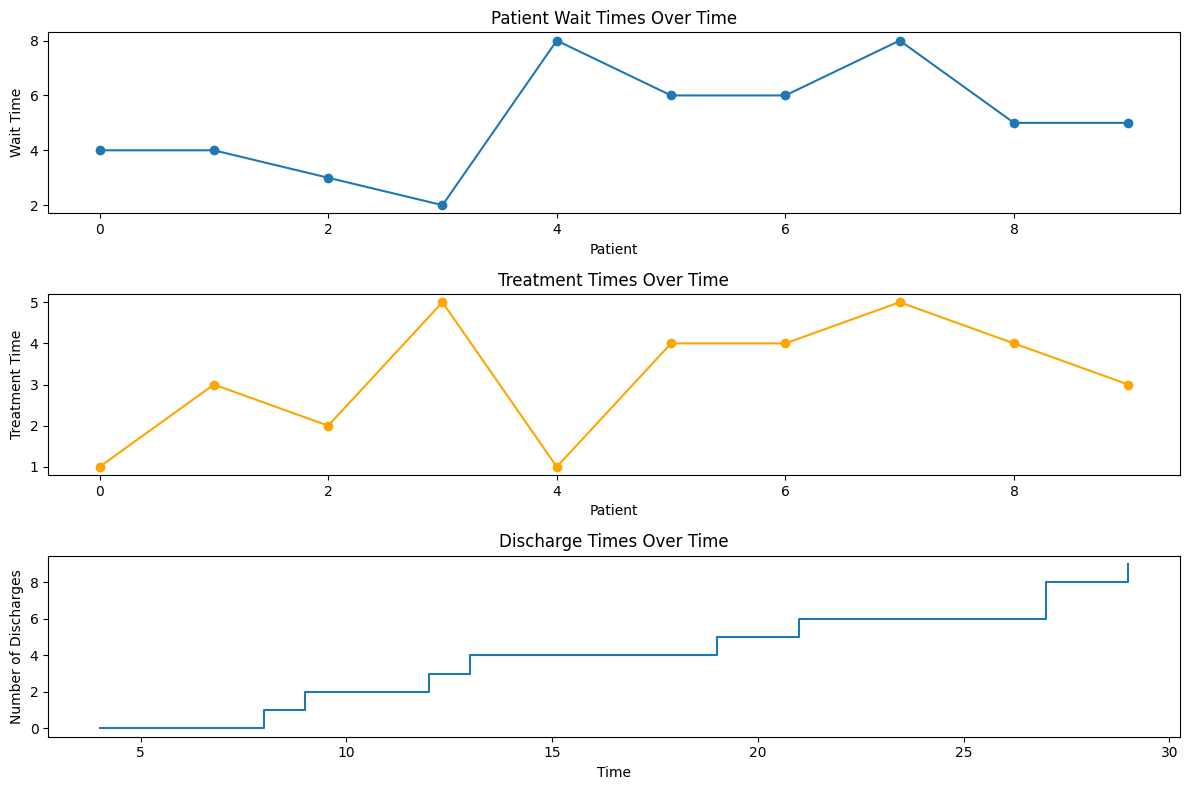

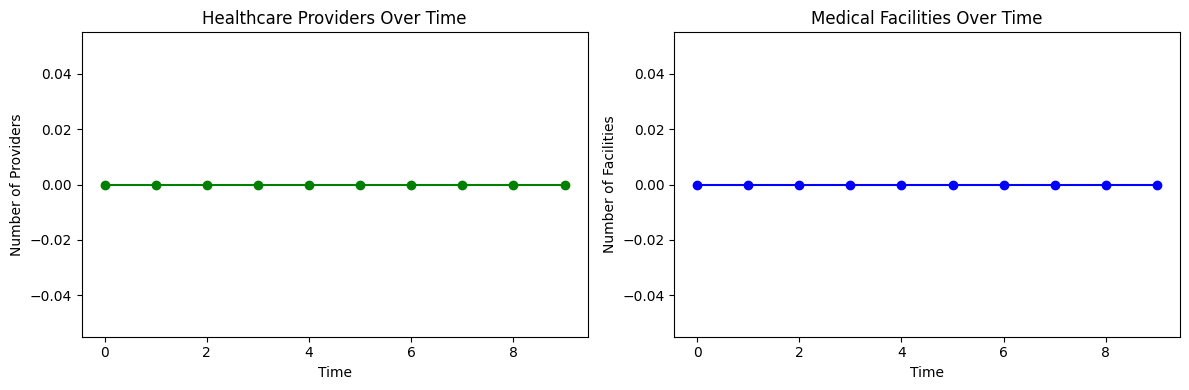

In [ ]:
import simpy
import random
import matplotlib.pyplot as plt

class HealthcareSystem:
    def __init__(self, env, initial_providers, initial_facilities):
        self.env = env
        self.providers = simpy.Resource(env, capacity=initial_providers)
        self.facilities = simpy.Resource(env, capacity=initial_facilities)
        self.wait_times = []
        self.treatment_times = []
        self.discharge_times = []

    def patient_flow(self, patient):
        arrival_time = self.env.now
        with self.providers.request() as req:
            yield req
            # Treatment completion process
            yield self.env.timeout(random.randint(1, 5))
            treatment_completion_time = self.env.now
            self.treatment_times.append(treatment_completion_time - arrival_time)

        # Discharge process
        with self.facilities.request() as req:
            yield req
            yield self.env.timeout(random.randint(1, 3))

        discharge_time = self.env.now
        self.wait_times.append(discharge_time - arrival_time)
        self.discharge_times.append(discharge_time)

    def resource_allocation_stats(self):
        return len(self.providers.users), len(self.facilities.users)

def patient_generator(env, healthcare_system, num_patients):
    for i in range(num_patients):
        env.process(healthcare_system.patient_flow(i))
        yield env.timeout(random.randint(1, 4))

def run_simulation():
    env = simpy.Environment()
    healthcare_system = HealthcareSystem(env, initial_providers=5, initial_facilities=10)
    env.process(patient_generator(env, healthcare_system, num_patients=10))
    env.run(until=30)

    # Plotting
    plt.figure(figsize=(12, 8))

    # Patient Wait Times
    plt.subplot(3, 1, 1)
    plt.plot(healthcare_system.wait_times, marker='o', linestyle='-')
    plt.title('Patient Wait Times Over Time')
    plt.xlabel('Patient')
    plt.ylabel('Wait Time')

    # Treatment Times
    plt.subplot(3, 1, 2)
    plt.plot(healthcare_system.treatment_times, marker='o', linestyle='-', color='orange')
    plt.title('Treatment Times Over Time')
    plt.xlabel('Patient')
    plt.ylabel('Treatment Time')

    # Discharge Times
    plt.subplot(3, 1, 3)
    plt.step(healthcare_system.discharge_times, range(len(healthcare_system.discharge_times)), where='post', linestyle='-')
    plt.title('Discharge Times Over Time')
    plt.xlabel('Time')
    plt.ylabel('Number of Discharges')

    plt.tight_layout()
    plt.show()

    # Resource Allocation Statistics
    providers, facilities = zip(*[healthcare_system.resource_allocation_stats() for _ in range(len(healthcare_system.discharge_times))])

    # Plotting
    plt.figure(figsize=(12, 4))

    # Healthcare Providers
    plt.subplot(1, 2, 1)
    plt.plot(providers, marker='o', linestyle='-', color='green')
    plt.title('Healthcare Providers Over Time')
    plt.xlabel('Time')
    plt.ylabel('Number of Providers')

    # Medical Facilities
    plt.subplot(1, 2, 2)
    plt.plot(facilities, marker='o', linestyle='-', color='blue')
    plt.title('Medical Facilities Over Time')
    plt.xlabel('Time')
    plt.ylabel('Number of Facilities')

    plt.tight_layout()
    plt.show()

run_simulation()


Patient 0 has been discharged at time 4
Patient 1 has been discharged at time 8
Patient 2 has been discharged at time 13
Patient 3 has been discharged at time 13
Patient 4 has been discharged at time 18
Patient 5 has been discharged at time 19
Patient 6 has been discharged at time 22
Patient 7 has been discharged at time 26


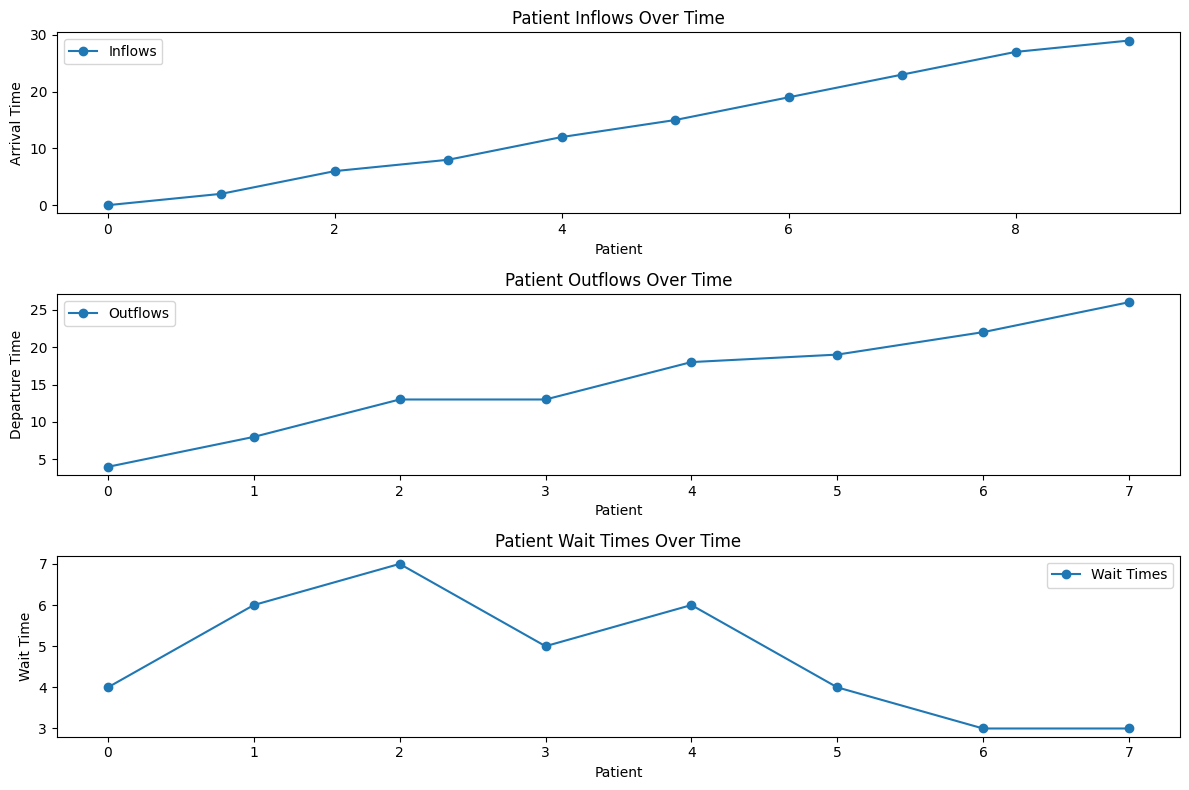

In [ ]:
import simpy
import random
import matplotlib.pyplot as plt

class HealthcareSystem:
    def __init__(self, env, initial_providers, initial_facilities):
        self.env = env
        self.providers = simpy.Resource(env, capacity=initial_providers)
        self.facilities = simpy.Resource(env, capacity=initial_facilities)
        self.wait_times = []
        self.inflows = []
        self.outflows = []

    def patient_flow(self, patient):
        arrival_time = self.env.now
        self.inflows.append(arrival_time)

        with self.providers.request() as req:
            yield req
            # Treatment completion process
            yield self.env.timeout(random.randint(1, 5))

        treatment_completion_time = self.env.now

        # Discharge process
        with self.facilities.request() as req:
            yield req
            yield self.env.timeout(random.randint(1, 3))

        discharge_time = self.env.now
        self.wait_times.append(discharge_time - arrival_time)
        self.outflows.append(discharge_time)

        print(f"Patient {patient} has been discharged at time {discharge_time}")

def patient_generator(env, healthcare_system, num_patients):
    for i in range(num_patients):
        env.process(healthcare_system.patient_flow(i))
        yield env.timeout(random.randint(1, 4))

def run_simulation():
    env = simpy.Environment()
    healthcare_system = HealthcareSystem(env, initial_providers=5, initial_facilities=10)
    env.process(patient_generator(env, healthcare_system, num_patients=10))
    env.run(until=30)

    # Plotting
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(healthcare_system.inflows, marker='o', label='Inflows')
    plt.title('Patient Inflows Over Time')
    plt.xlabel('Patient')
    plt.ylabel('Arrival Time')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(healthcare_system.outflows, marker='o', label='Outflows')
    plt.title('Patient Outflows Over Time')
    plt.xlabel('Patient')
    plt.ylabel('Departure Time')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(healthcare_system.wait_times, marker='o', label='Wait Times')
    plt.title('Patient Wait Times Over Time')
    plt.xlabel('Patient')
    plt.ylabel('Wait Time')
    plt.legend()

    plt.tight_layout()
    plt.show()

run_simulation()


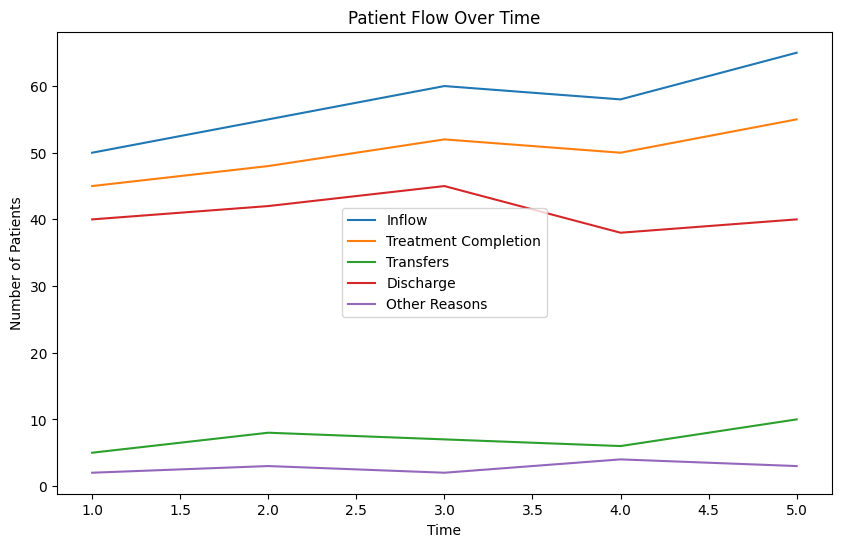

In [ ]:
import matplotlib.pyplot as plt

# Example data (replace with your simulated data)
time_points = [1, 2, 3, 4, 5]
inflow_data = [50, 55, 60, 58, 65]
completion_data = [45, 48, 52, 50, 55]
transfer_data = [5, 8, 7, 6, 10]
discharge_data = [40, 42, 45, 38, 40]
other_reasons_data = [2, 3, 2, 4, 3]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time_points, inflow_data, label='Inflow')
plt.plot(time_points, completion_data, label='Treatment Completion')
plt.plot(time_points, transfer_data, label='Transfers')
plt.plot(time_points, discharge_data, label='Discharge')
plt.plot(time_points, other_reasons_data, label='Other Reasons')

plt.title('Patient Flow Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()


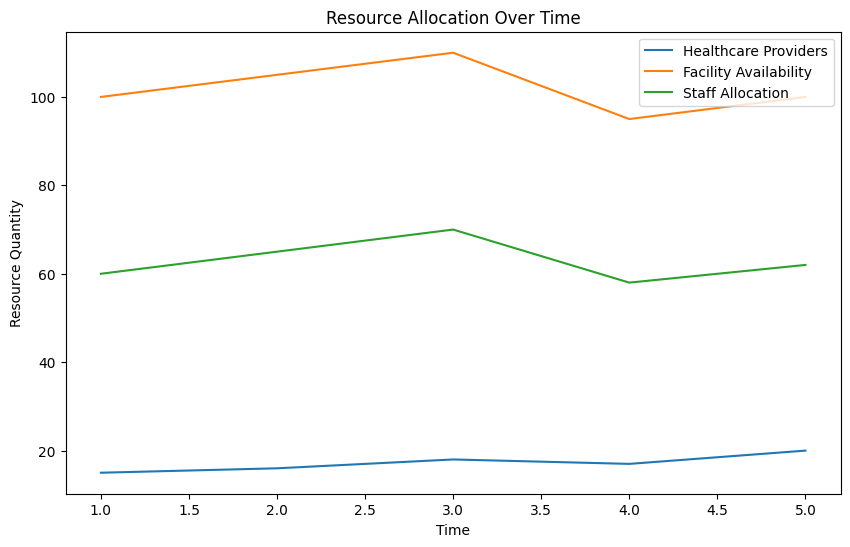

In [ ]:
# Example data (replace with your simulated data)
providers_data = [15, 16, 18, 17, 20]
facility_data = [100, 105, 110, 95, 100]
staff_allocation_data = [60, 65, 70, 58, 62]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time_points, providers_data, label='Healthcare Providers')
plt.plot(time_points, facility_data, label='Facility Availability')
plt.plot(time_points, staff_allocation_data, label='Staff Allocation')

plt.title('Resource Allocation Over Time')
plt.xlabel('Time')
plt.ylabel('Resource Quantity')
plt.legend()
plt.show()
